In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import joblib
from joblib import dump
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score
import seaborn as sns

In [262]:
!pip install -U scikit-learn==1.5.0
!pip install joblib --upgrade

In [263]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advertising.csv')

In [264]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [265]:
data = data.drop('Unnamed: 0', axis =1) #dropping unnecessary variables such a Unnamed: 0 as it does not contribute to the final result
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [267]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [268]:
data = pd.DataFrame(data)

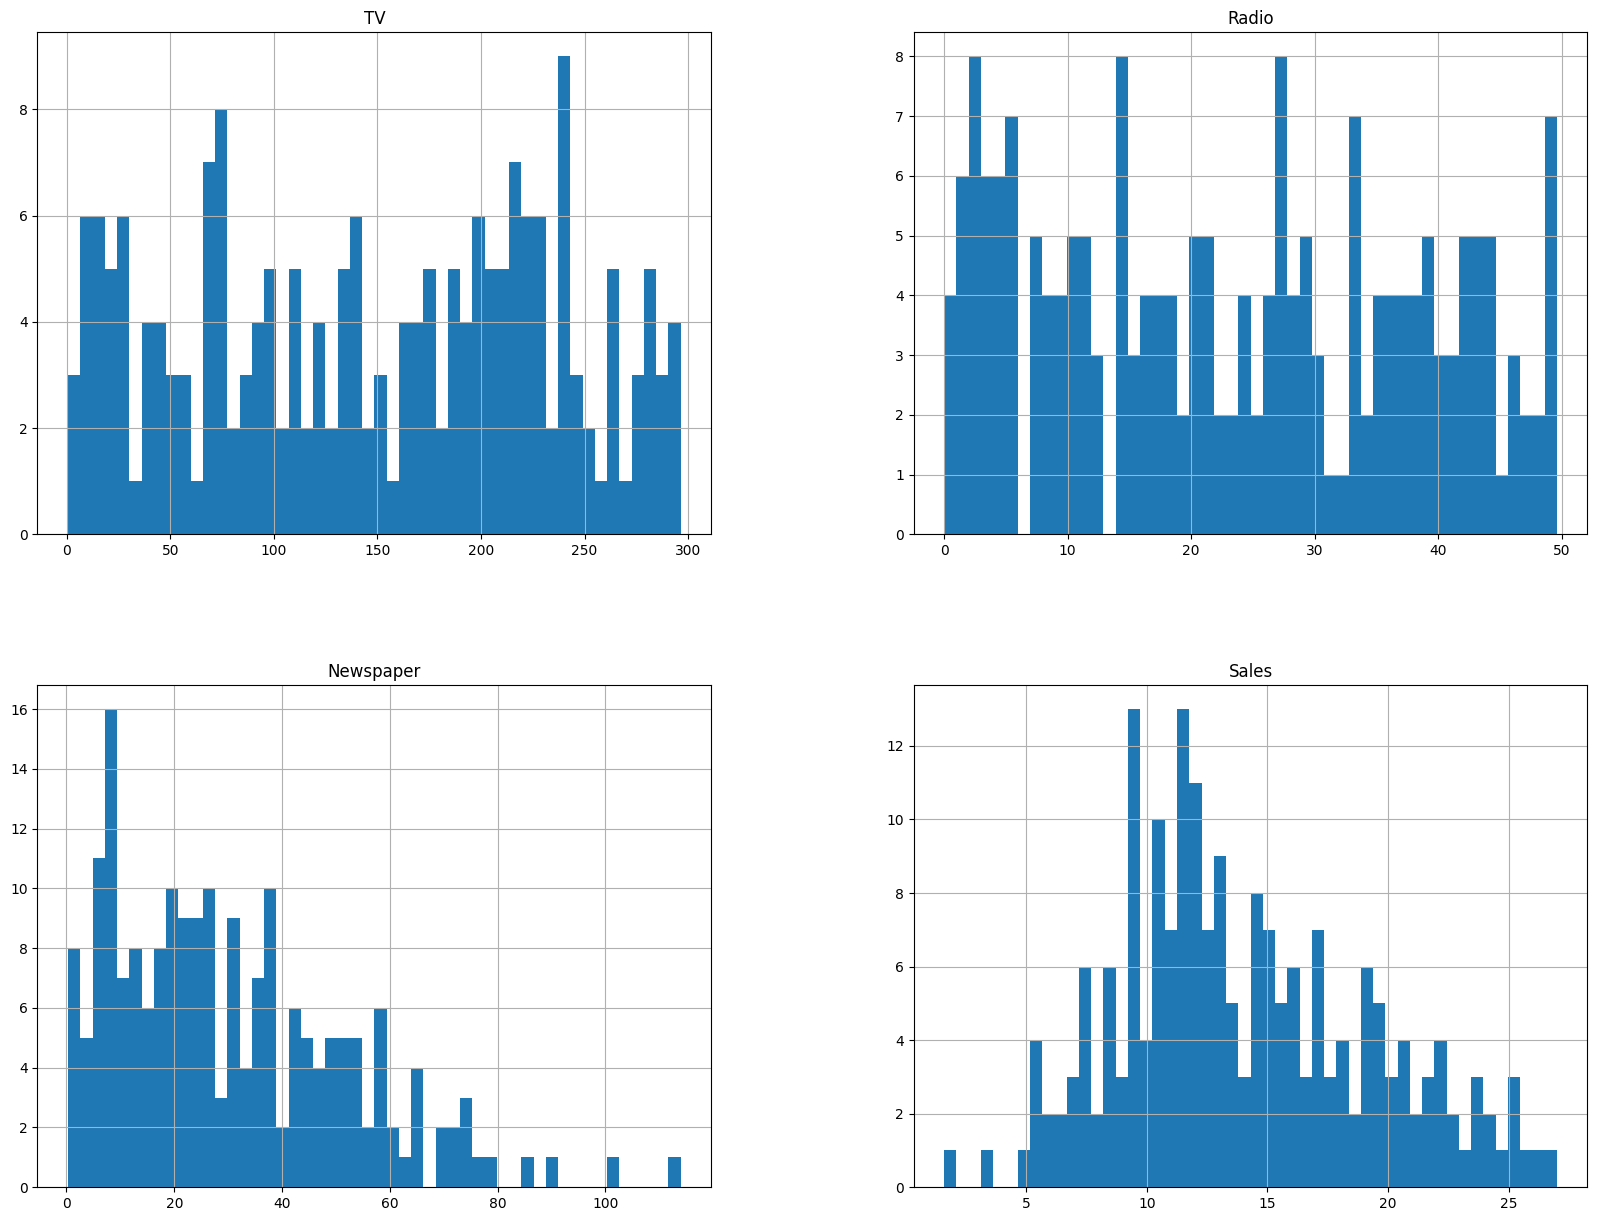

In [269]:
data.hist(bins=50, figsize=(20,15))
plt.show()


In [270]:
Y = data['Sales']

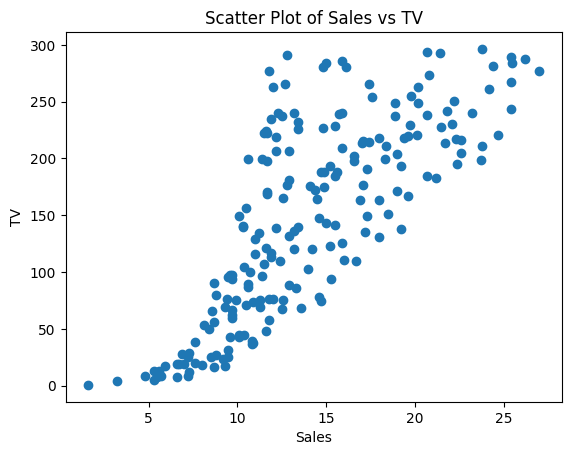

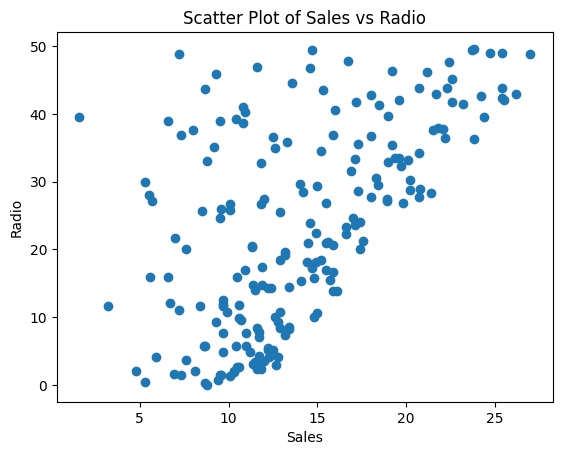

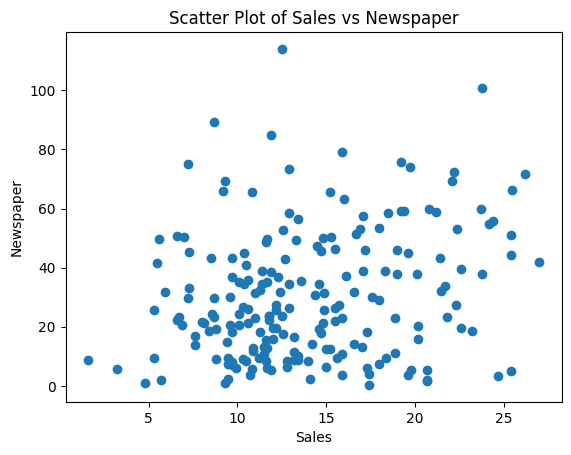

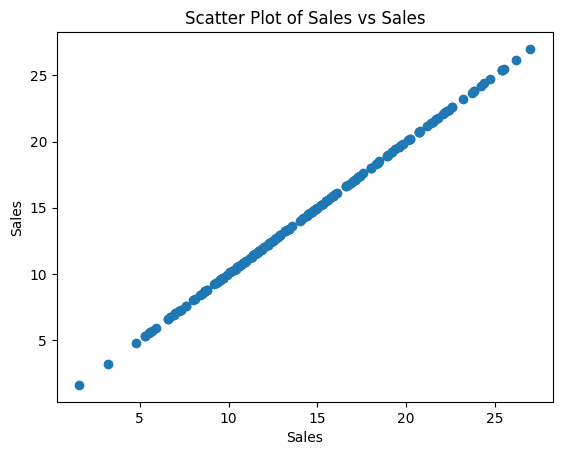

In [271]:
for i in data:
  plt.scatter(data['Sales'], data[i])
  plt.xlabel('Sales')
  plt.ylabel(i)
  plt.title(f'Scatter Plot of Sales vs {i}')
  plt.show()

In [272]:
corr_matrix = data.corr()

In [273]:
corr_matrix["Sales"].sort_values(ascending=False
)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [274]:
X = data.drop("Sales",axis=1)

In [275]:
scaler = StandardScaler()

In [276]:
scaled = scaler.fit_transform(X)
data = pd.DataFrame(scaled, columns=data.columns.drop('Sales'))
X = data

In [277]:
X

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [278]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [279]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [280]:
rf=RandomForestRegressor()

In [281]:
rf= RandomForestRegressor(n_estimators=1000, random_state=42)

In [282]:
rf.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [283]:
rf_pred = rf.predict(Xtest)

In [284]:
rf_pred

array([17.6903, 21.6564, 20.6882,  6.7172, 23.1439, 13.3273, 22.6   ,
        9.6394, 11.8404, 15.5291,  7.5233,  9.0501, 12.1744,  4.6277,
       10.5198, 12.6028,  6.4228, 16.4338, 11.3011, 19.5682, 20.0391,
       12.9886, 10.2784, 22.0807, 10.0132,  8.9489, 22.358 , 12.6717,
       10.1885,  5.1952, 11.5613, 10.8619, 22.1301,  8.4611, 15.3167,
       20.3944, 12.142 , 20.6907, 12.3145,  7.5757])

In [285]:
mae = mean_absolute_error(rf_pred,Ytest)
print("Mean absolute error :" ,mae)

Mean absolute error : 0.6311774999999875


In [286]:
r2 = r2_score(rf_pred, Ytest)
print(f"R-squared: {r2}")

R-squared: 0.9811447163706359


In [287]:
joblib.dump(rf, 'rf.joblib')

['rf.joblib']

In [289]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [292]:
import pickle
import joblib
import streamlit as st
joblib.dump(rf, 'rf.pkl')

pickle.dump(rf,open('rf.pkl','wb'))

with open('rf.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

def preprocess_input(input_data):
    scaled_input = scaler.transform(input_data)
    return scaled_input

# Function to make predictions
def predict(input_data):
    scaled_input = preprocess_input(input_data)
    prediction = model.predict(scaled_input)
    return prediction

# Streamlit app code
if __name__ == '__main__':
    st.title('Model Prediction App')

    # User input fields
    TV = st.number_input("TV", min_value=0)
    Radio = st.number_input("Radio", min_value=0)
    Newspaper = st.number_input("Newspaper", min_value=0)

    # Example input for demonstration
    input_data = np.array([[TV, Radio, Newspaper]])  # Assuming this is your input format

    # Handle prediction
    if st.button('Predict'):
        prediction = predict(input_data)
        st.write('Prediction:', prediction)

2024-06-25 19:35:13.639 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-06-25 19:35:13.641 Session state does not function when running a script without `streamlit run`
